# **Name: Sudharshan PS**
# *Course: Data Analytics and Visualization*
# *Roll no.: 3122225002138*
# ***Sec: IT-C***

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
heart_df = pd.read_csv('heart.csv')

# Basic data inspection
print(heart_df.describe())

heart_df.head()

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
#Checking the missing values
print(heart_df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


No feature has null values. So data imputation is not performed.

In [5]:
# Check the initial shape of the DataFrame before removing outliers
print(f'Original shape: {heart_df.shape}')
print(f'Shape after removing outliers: {heart_df.shape}')

# All are numerical columns only
# Calculate Z-scores for numerical features only*
z_scores = np.abs((heart_df - heart_df.mean()) / heart_df.std())

# Remove outliers
heart_df = heart_df[(z_scores < 3).all(axis=1)]
print()

# Check the shape of the DataFrame after removing outliers
print(f'Original shape: {heart_df.shape}')
print(f'Shape after removing outliers: {heart_df.shape}')

Original shape: (1025, 14)
Shape after removing outliers: (1025, 14)

Original shape: (969, 14)
Shape after removing outliers: (969, 14)


**56 rows have contained outliers** and have been dropped by their z-score and the dataframe is modified.

In [9]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
categorical_cols = heart_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding on categorical columns
heart_df_encoded = pd.get_dummies(heart_df, columns=categorical_cols,
                                  drop_first=True)

# Define features and target variable
features = heart_df_encoded.drop('target', axis=1)
target = heart_df_encoded['target']

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_heart_df = pd.DataFrame(scaled_features,
                                  columns=features.columns)

# Check the shape of the scaled features
print(f'Scaled features shape: {scaled_heart_df.shape}')

print("Scaled Heart Dataframe:")
scaled_heart_df.head()

Scaled features shape: (969, 13)
Scaled Heart Dataframe:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.266603,0.65192,-0.916593,-0.353744,-0.704253,-0.409231,0.883630,0.827816,-0.713685,-0.031656,0.989512,1.419532,1.138395
1,-0.156344,0.65192,-0.916593,0.532139,-0.899473,2.443609,-1.006519,0.252065,1.401179,1.891243,-2.299810,-0.733092,1.138395
2,1.718073,0.65192,-0.916593,0.827433,-1.528513,-0.409231,0.883630,-1.076590,1.401179,1.433410,-2.299810,-0.733092,1.138395
3,0.725735,0.65192,-0.916593,1.004610,-0.899473,-0.409231,0.883630,0.517796,-0.713685,-0.947322,0.989512,0.343220,1.138395
4,0.835994,-1.53393,-0.916593,0.414021,1.074411,2.443609,0.883630,-1.918072,-0.713685,0.792443,-0.655149,2.495844,-0.548310


In [10]:
import random
random.seed(75)

#Regression Equation and line generation

# Split the dataset
X_train,X_test,y_train,y_test = train_test_split(scaled_heart_df,
                                                target, test_size=0.2,
                                                random_state=42)

In [11]:
# Build the linear regression and fit the data
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercepts
print("Coefficients:", model.coef_)
print()
print("Intercept:", model.intercept_)

Coefficients: [-0.00217851 -0.09349144  0.09677157 -0.03446419 -0.02080124  0.01407853
  0.01691797  0.0529368  -0.05975446 -0.0648507   0.0569623  -0.13152041
 -0.09074902]

Intercept: 0.513057060694985


In [12]:
# Use the bulit model to make predictions
y_pred = model.predict(X_test)

In [13]:
# Accuracy of the model
model.score(X_test,y_test)

0.573863376871249

In [14]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 0.10580951065836375
RMSE: 0.3252837386934117
MAE: 0.263059149186065
R-squared: 0.573863376871249


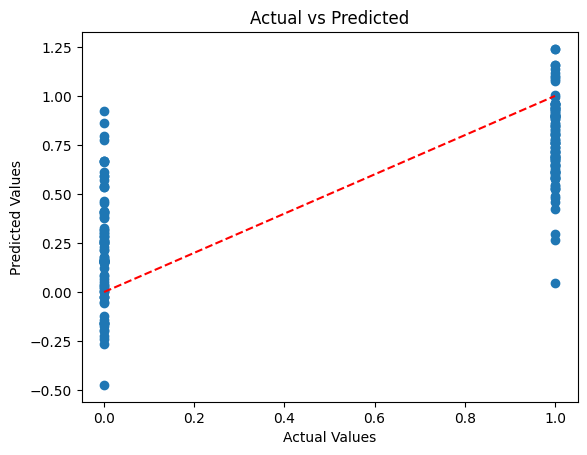

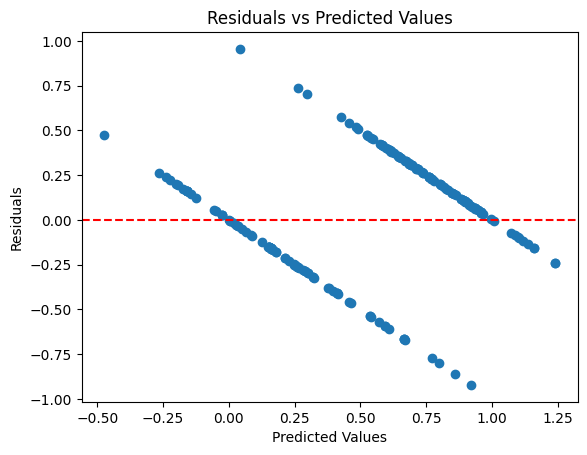

In [15]:
# Scatter plot of predictions vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()],
 [y_test.min(), y_test.max()], 'r--')
plt.show()
print()

# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Fit model again with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly, y_train);

In [17]:
#Regularization - For improving model performance
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [18]:
#The new accuracies

print("For Ridge model:",ridge_model.score(X_test,y_test))
print("For Lasso model:",lasso_model.score(X_test,y_test))

For Ridge model: 0.5738358250440432
For Lasso model: 0.4184678965520525


**No Improvement** , even though we tried by changing the model

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(grid_search.score(X_test,y_test))

0.5735748458137011


In [ ]:
#No improvement again.. Even after Hyperparameter tuning

In [20]:
print("The final fixed score is:",0.5735)

The final fixed score is: 0.5735


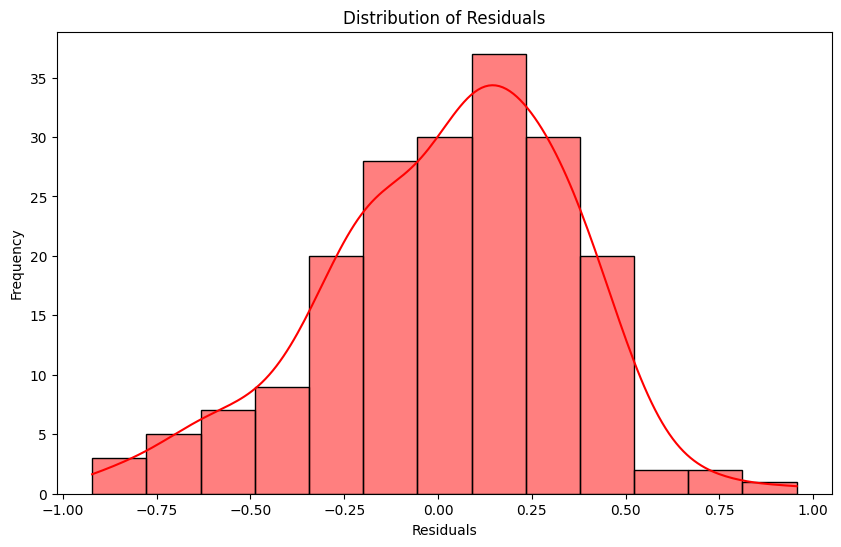

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

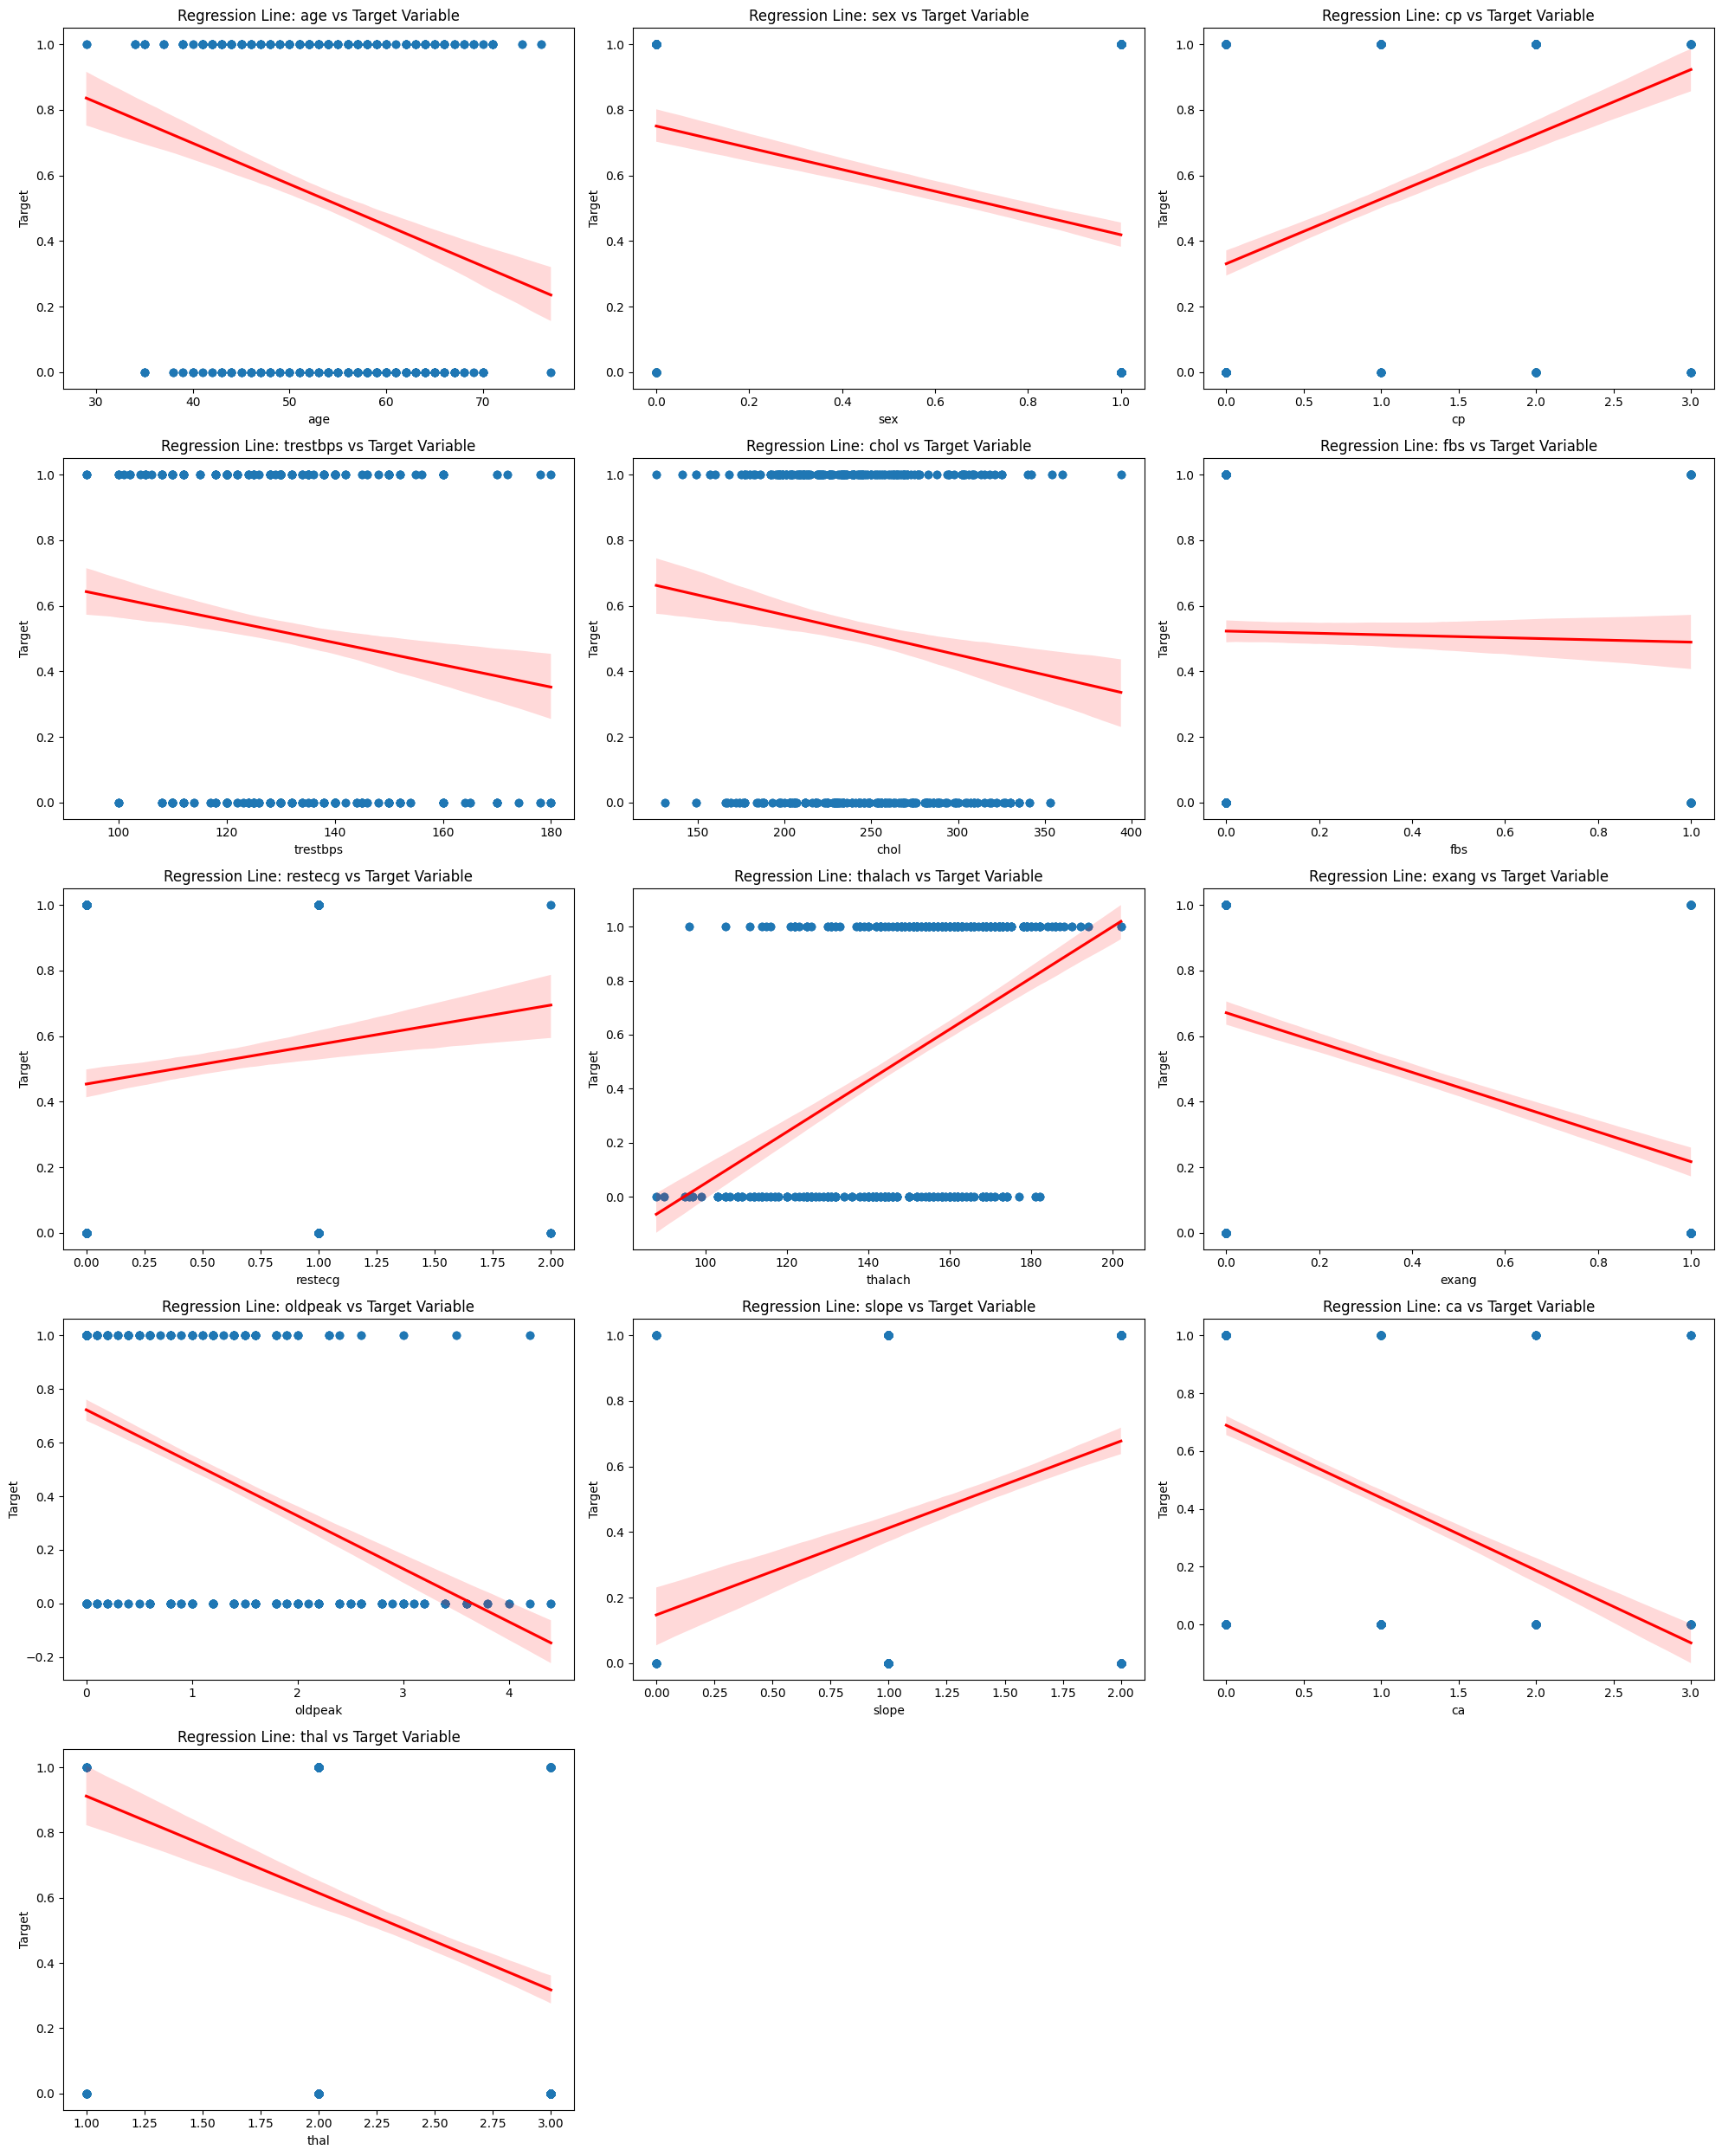

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

n_cols = 3
n_features = heart_df.drop('target', axis=1)
n_features = n_features.select_dtypes(include=[np.number]).columns
n_rows = (len(n_features) + n_cols - 1) // n_cols

# Create a figure with subplots
plt.figure(figsize=(20, n_rows * 5))

for i, feature in enumerate(n_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.regplot(x=heart_df[feature], y=heart_df['target'],
                line_kws={"color": "red"})
    plt.title(f'Regression Line: {feature} vs Target Variable')
    plt.xlabel(feature)
    plt.ylabel('Target')

plt.tight_layout()
plt.show()

In [25]:
#Inference:

'''The model's score is always 0.5735, even after
hyperparameter tuning and regularization and feature engineering, and
there is only decrease in R^2 score of the model by
changing from linear regression model''';

'''The regression model performs lower than ensemble models
and random forest models again''';